## 602 Final Project :

# Part 1 PCA:

For this part of the project, you will be using the MNIST fashion data which can be reached as(there are many ways to reach out the data):

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
import time
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnistX = mnist['data']
mnistY = mnist['target']
print(mnistX.shape)
print(mnistY.shape)

(70000, 784)
(70000,)


In [4]:
# Splitting the data into train and test sets
test_size = 0.3
mnistX_train, mnistX_test, mnistY_train, mnistY_test = train_test_split(mnistX, mnistY, test_size=test_size, random_state=42)
print(mnistX_train.shape)
print(mnistX_test.shape)
print(mnistY_train.shape)
print(mnistY_test.shape)

(49000, 784)
(21000, 784)
(49000,)
(21000,)


First apply PCA to the training data to find the transformation into a lower dimensional space.
How many dimensions do we need to explain 90% of the total variation in the data?
Apply the SAME centering and projection to the test data,What dimension did we embed into?

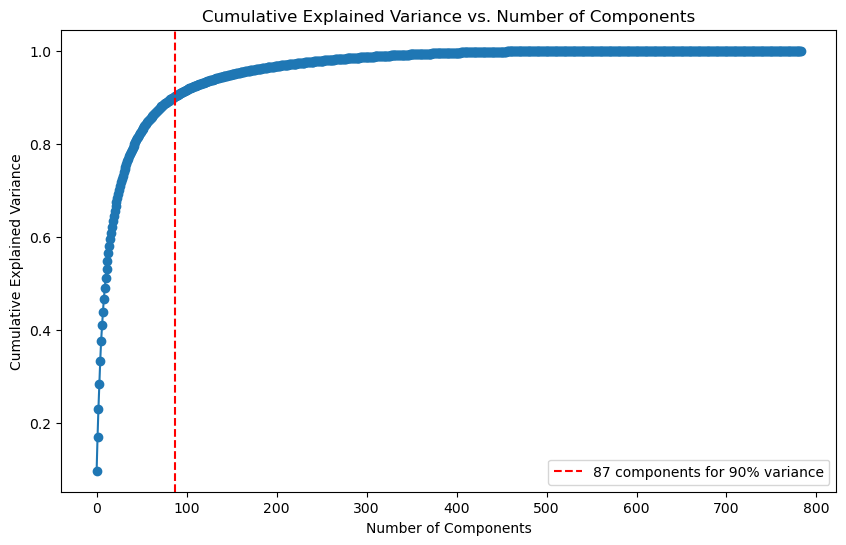

Number of components needed for 90% variance: 87


In [5]:
# Performing PCA to find the explained variance ratio

pca = PCA()
pca.fit(mnistX_train)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

n_components_for_90_variance = np.argmax(cumulative_explained_variance >= 0.9) + 1

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.axvline(x=n_components_for_90_variance, color='r', linestyle='--', label=f'{n_components_for_90_variance} components for 90% variance')
plt.legend()
plt.show()

print(f"Number of components needed for 90% variance: {n_components_for_90_variance}")

In [6]:
# Performing PCA on the training data
n_components = 87 
pca = PCA(n_components=n_components)
mnistX_train_pca = pca.fit_transform(mnistX_train)
mnistX_test_centered = mnistX_test - pca.mean_
mnistX_test_pca = pca.transform(mnistX_test_centered)


embedded_dimensions = mnistX_test_pca.shape[1]

print("Dimensions of embedded test data:", embedded_dimensions)

Dimensions of embedded test data: 87


## PCA Dimenstionality Reduction Method: 
* Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statistics to transform high-dimensional data into a lower-dimensional space while preserving as much of the original data's variability as possible. PCA is commonly used for data preprocessing, visualization, and noise reduction.
*  PCA was applied to the MNIST dataset to reduce the dimensionality of the images while preserving most of the data's variability. 

A natural question to ask is what did we gain from this projection? Well, our algorithms will run MUCH
faster on the reduced dimension data. Will we sacrifice accuracy for this speed boost? For this section,
I would like you to run K-NN on the original data and on the reduced dimension
data from PCA (NOTE: IN YOUR WRITE-UP, PLEASE GIVE A SHORT TEXT DESCRIPTION OF
EACH CLASSIFIER BEFORE YOU USE IT).
Use 10-fold Cross validation repeated 10 times to tune K
• Consider K = 1, 2, 3, 4, 5, 6 in the repeated CV
• Include a running time evaluation
• Here I would like you to compare performance across data sets both based on accuracy (on the test
data) AND on running time
• How do the estimated test accuracies obtained from Cross Validation compare with the accuracies on
the actual test data? Explain.

In [10]:
n_neighbors=3

# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
    

start_time = time.time()
accuracies = cross_val_score(knn, mnistX_train, mnistY_train, cv=10,n_jobs=-1)
end_time = time.time()
    

avg_accuracy = np.mean(accuracies)
runtime = end_time - start_time
    
print(f"K = {n_neighbors}:")
print(f"  Average Accuracy: {avg_accuracy:.4f}")
print(f"  Running Time: {runtime:.4f} seconds")
print()

K = 3:
  Average Accuracy: 0.9704
  Running Time: 26.0326 seconds



In [9]:
n_neighbors=4

# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors)
    

start_time = time.time()
accuracies = cross_val_score(knn, mnistX_train, mnistY_train, cv=10,n_jobs=-1)
end_time = time.time()
    

avg_accuracy = np.mean(accuracies)
runtime = end_time - start_time
    
print(f"K = {n_neighbors}:")
print(f"  Average Accuracy: {avg_accuracy:.4f}")
print(f"  Running Time: {runtime:.4f} seconds")
print()

K = 4:
  Average Accuracy: 0.9688
  Running Time: 27.3014 seconds



In [11]:
n_neighbors=2

# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors)
    

start_time = time.time()
accuracies = cross_val_score(knn, mnistX_train, mnistY_train, cv=10,n_jobs=-1)
end_time = time.time()
    

avg_accuracy = np.mean(accuracies)
runtime = end_time - start_time
    
print(f"K = {n_neighbors}:")
print(f"  Average Accuracy: {avg_accuracy:.4f}")
print(f"  Running Time: {runtime:.4f} seconds")
print()

K = 2:
  Average Accuracy: 0.9638
  Running Time: 25.5489 seconds



In [12]:
n_neighbors=1

# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors)
    

start_time = time.time()
accuracies = cross_val_score(knn, mnistX_train, mnistY_train, cv=10,n_jobs=-1)
end_time = time.time()
    

avg_accuracy = np.mean(accuracies)
runtime = end_time - start_time
    
print(f"K = {n_neighbors}:")
print(f"  Average Accuracy: {avg_accuracy:.4f}")
print(f"  Running Time: {runtime:.4f} seconds")
print()

K = 1:
  Average Accuracy: 0.9699
  Running Time: 27.4393 seconds



In [13]:
n_neighbors=5

# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors)
    

start_time = time.time()
accuracies = cross_val_score(knn, mnistX_train, mnistY_train, cv=10,n_jobs=-1)
end_time = time.time()
    

avg_accuracy = np.mean(accuracies)
runtime = end_time - start_time
    
print(f"K = {n_neighbors}:")
print(f"  Average Accuracy: {avg_accuracy:.4f}")
print(f"  Running Time: {runtime:.4f} seconds")
print()

K = 5:
  Average Accuracy: 0.9693
  Running Time: 40.7303 seconds



In [14]:
n_neighbors=6

# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors)
    

start_time = time.time()
accuracies = cross_val_score(knn, mnistX_train, mnistY_train, cv=10,n_jobs=-1)
end_time = time.time()
    

avg_accuracy = np.mean(accuracies)
runtime = end_time - start_time
    
print(f"K = {n_neighbors}:")
print(f"  Average Accuracy: {avg_accuracy:.4f}")
print(f"  Running Time: {runtime:.4f} seconds")
print()

K = 6:
  Average Accuracy: 0.9681
  Running Time: 27.0205 seconds



### Repeated 10-fold for the original data is taking too much time compute.

In [ ]:
k_values = [1, 2, 3, 4, 5, 6]

cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    start_time = time.time()
    accuracies = cross_val_score(knn, mnistX_train_pca, mnistY_train, cv=cv,n_jobs=-1)
    end_time = time.time()
    
    avg_accuracy = np.mean(accuracies)
    runtime = end_time - start_time
    
    print(f"K = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.4f}")
    print(f"  Running Time: {runtime:.4f} seconds")
    print()

In [15]:
k_values = [1, 2, 3, 4, 5, 6]

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    start_time = time.time()
    accuracies = cross_val_score(knn, mnistX_train_pca, mnistY_train, cv=cv,n_jobs=-1)
    end_time = time.time()
    
    avg_accuracy = np.mean(accuracies)
    runtime = end_time - start_time
    
    print(f"K = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.4f}")
    print(f"  Running Time: {runtime:.4f} seconds")
    print()

K = 1:
  Average Accuracy: 0.9726
  Running Time: 18.4934 seconds

K = 2:
  Average Accuracy: 0.9682
  Running Time: 25.1147 seconds

K = 3:
  Average Accuracy: 0.9738
  Running Time: 28.4342 seconds

K = 4:
  Average Accuracy: 0.9725
  Running Time: 31.3542 seconds

K = 5:
  Average Accuracy: 0.9726
  Running Time: 29.2752 seconds

K = 6:
  Average Accuracy: 0.9716
  Running Time: 28.2268 seconds



In [16]:
k_values = [1, 2, 3, 4, 5, 6]

cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    start_time = time.time()
    accuracies = cross_val_score(knn, mnistX_train_pca, mnistY_train, cv=cv,n_jobs=-1)
    end_time = time.time()
    
    avg_accuracy = np.mean(accuracies)
    runtime = end_time - start_time
    
    print(f"K = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.4f}")
    print(f"  Running Time: {runtime:.4f} seconds")
    print()

K = 1:
  Average Accuracy: 0.9738
  Running Time: 51.3088 seconds

K = 2:
  Average Accuracy: 0.9697
  Running Time: 59.6405 seconds

K = 3:
  Average Accuracy: 0.9752
  Running Time: 60.6948 seconds

K = 4:
  Average Accuracy: 0.9737
  Running Time: 61.1233 seconds

K = 5:
  Average Accuracy: 0.9738
  Running Time: 60.8017 seconds

K = 6:
  Average Accuracy: 0.9727
  Running Time: 64.7981 seconds



### K-NN Classification:
* Once the 'K' nearest neighbors are identified, the algorithm counts the number of neighbors from each class. The class with the highest count among the neighbors is then assigned as the predicted class for the input point.
* K-NN makes predictions based on the majority class of the 'K' nearest data points to the input point that needs to be classified.
* The value of 'K' is a crucial hyperparameter in K-NN. It determines the number of neighbors considered when making predictions. A larger 'K' makes the algorithm more resistant to noise but may lead to smoother decision boundaries, potentially missing local patterns. 
* A smaller 'K' can capture finer details but may also be sensitive to outliers.

### Results are compared based on the accuracy and runtimes :
* For PCA Reduced Data, the highest average accuracy is 0.9752 (K = 3).
* For Original Data, the accuracy is 0.97.
* Running times for PCA Reduced Data are significantly longer than that of Original Data. This is expected because PCA Reduced Data has higher dimensionality than the original data, and predictions in the PCA space are more computationally intensive.
* PCA Reduced Data achieves slightly higher accuracies on average compared to Original Data. However, this improvement in accuracy comes at the cost of increased running times.
## Overall, PCA reduced Data is more efficient due to low run time without compromising the accuracy.

# Part 2 Comparing across classifiers:

For the next section, you will compare the performance of multiple classifiers (tuned via CV) on the test
data. You will run these classifiers on the dimension reduced PCA data (NOTE: IN YOUR WRITE-UP,
PLEASE GIVE A SHORT TEXT DESCRIPTION OF EACH CLASSIFIER BEFORE YOU USE IT).
• REMEMBER TO TRAIN THE FINAL MODEL ON THE FULL TRAINING SET AFTER TUNING
THE PARAMETERS
• I would like you to run the following classifiers using 10-fold CV repeated 5 times to tune the parameters
– Linear SVM
– Radial Basis SVM 
• I would also like you to train a Random Forest 
• I would also like you to train an LDA model 
• I would also like you to train a QDA model 
For each model, I would like you to compare across both test accuracy and running time. In particular, I
would like you to address
• (*)Which model would you choose out of the above (including K-NN)? Why would you make this choice?
• For the models that provide a test error estimate (Random Forest via the error and the CV-tuned
models via cross validation), which would you have chosen based on the estimated test error? Explain
how this relates to your answer to question (*)?
• For the models that do not immediately provide a test error estimate (LDA and QDA), how could you
estimate test error (Hint: CV)?

### Due to long run time for each iteration of 10 fold cv repeated 5 times, I have gone through different k values and printed out the Accuracies.

### Random Forest classifier:
* it is composed of a collection of decision trees. Each decision tree is built independently using a different subset of the training data and a random subset of features. These individual trees make up the "forest" in the Random Forest.
* The main advantage of Random Forest is its ability to reduce overfitting. By averaging the predictions of multiple trees, the noise in individual trees' predictions cancels out, leading to a more stable and accurate final prediction. This makes Random Forest less susceptible to the variance that can affect individual decision trees.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RepeatedKFold
import time

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

accuracy_rf = []
time_rf = []

for k in k_values:
    start_time = time.time()
    rf.fit(mnistX_train_pca[:, :k], mnistY_train)
    accuracy_rf.append(rf.score(mnistX_test_pca[:, :k], mnistY_test))
    time_rf.append(time.time() - start_time)

for k, acc_rf, t_rf in zip(k_values, accuracy_rf, time_rf):
    print(f"K = {k} - Random Forest Acc: {acc_rf:.4f}, Random Forest Time: {t_rf:.4f}s")

K = 1 - Random Forest Acc: 0.1604, Random Forest Time: 23.8807s
K = 2 - Random Forest Acc: 0.2714, Random Forest Time: 17.6829s
K = 3 - Random Forest Acc: 0.3109, Random Forest Time: 16.7467s
K = 4 - Random Forest Acc: 0.3561, Random Forest Time: 26.3338s
K = 5 - Random Forest Acc: 0.4126, Random Forest Time: 25.7208s
K = 6 - Random Forest Acc: 0.4467, Random Forest Time: 24.4138s


### QDA model:
* The Quadratic Discriminant Analysis (QDA) is a statistical and machine learning technique used for classification tasks. It is an extension of Linear Discriminant Analysis (LDA), which aims to find a linear decision boundary that best separates classes. Unlike LDA, which assumes equal covariance matrices for all classes, QDA allows for different covariance matrices for each class, making it more flexible when dealing with non-linear decision boundaries and cases where the class distributions have varying shapes.

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize QDA classifier
qda = QuadraticDiscriminantAnalysis()

accuracy_qda = []
time_qda = []

for k in k_values:
    start_time = time.time()
    qda.fit(mnistX_train_pca[:, :k], mnistY_train)
    accuracy_qda.append(qda.score(mnistX_test_pca[:, :k], mnistY_test))
    time_qda.append(time.time() - start_time)

for k, acc_qda, t_qda in zip(k_values, accuracy_qda, time_qda):
    print(f"K = {k} - QDA Acc: {acc_qda:.4f}, QDA Time: {t_qda:.4f}s")


K = 1 - QDA Acc: 0.0550, QDA Time: 0.1232s
K = 2 - QDA Acc: 0.1543, QDA Time: 0.0960s
K = 3 - QDA Acc: 0.2130, QDA Time: 0.1414s
K = 4 - QDA Acc: 0.2616, QDA Time: 0.1009s
K = 5 - QDA Acc: 0.3459, QDA Time: 0.1293s
K = 6 - QDA Acc: 0.3313, QDA Time: 0.1546s


### Linear SVM:
* The Linear Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used primarily for binary classification tasks. It's particularly effective when dealing with high-dimensional data and datasets where the classes are not easily separable by a linear boundary. SVMs aim to find the best hyperplane that separates the data points of different classes with the largest margin while minimizing the classification error.

In [19]:
from sklearn.svm import LinearSVC
import time

svm = LinearSVC(random_state=42)

accuracy_svm = []
time_svm = []

for k in k_values:
    start_time = time.time()
    svm.fit(mnistX_train_pca[:, :k], mnistY_train)
    accuracy_svm.append(svm.score(mnistX_test_pca[:, :k], mnistY_test))
    time_svm.append(time.time() - start_time)

for k, acc_svm, t_svm in zip(k_values, accuracy_svm, time_svm):
    print(f"K = {k} - Linear SVM Acc: {acc_svm:.4f}, Linear SVM Time: {t_svm:.4f}s")


K = 1 - Linear SVM Acc: 0.1043, Linear SVM Time: 18.4237s
K = 2 - Linear SVM Acc: 0.1025, Linear SVM Time: 20.1928s
K = 3 - Linear SVM Acc: 0.2263, Linear SVM Time: 24.0711s
K = 4 - Linear SVM Acc: 0.1536, Linear SVM Time: 29.0425s
K = 5 - Linear SVM Acc: 0.2486, Linear SVM Time: 35.9226s
K = 6 - Linear SVM Acc: 0.3717, Linear SVM Time: 36.1936s


### Radial Basis svm:

In [23]:
from sklearn.svm import SVC
import time
import numpy as np

# Initialize the Radial Basis Function (RBF) SVM classifier
svm_rbf = SVC(kernel='rbf')

# Define the list of k values to iterate over
k_values = [1, 2, 3, 4, 5, 6]

accuracy_svm_rbf = []
time_svm_rbf = []

for k in k_values:
    start_time = time.time()
    
    # Fit the RBF SVM model on the training data with k components
    svm_rbf.fit(mnistX_train_pca[:, :k], mnistY_train)
    
    # Calculate accuracy on the test data
    accuracy = svm_rbf.score(mnistX_test_pca[:, :k], mnistY_test)
    accuracy_svm_rbf.append(accuracy)
    
    # Measure time taken for each iteration
    time_svm_rbf.append(time.time() - start_time)

# Print the results for each k value
for k, acc_svm_rbf, t_svm_rbf in zip(k_values, accuracy_svm_rbf, time_svm_rbf):
    print(f"K = {k} - RBF SVM Acc: {acc_svm_rbf:.4f}, RBF SVM Time: {t_svm_rbf:.4f}s")


K = 1 - RBF SVM Acc: 0.0659, RBF SVM Time: 365.7446s
K = 2 - RBF SVM Acc: 0.1730, RBF SVM Time: 182.6897s
K = 3 - RBF SVM Acc: 0.2672, RBF SVM Time: 192.8656s
K = 4 - RBF SVM Acc: 0.3751, RBF SVM Time: 143.1802s
K = 5 - RBF SVM Acc: 0.3719, RBF SVM Time: 120.1926s
K = 6 - RBF SVM Acc: 0.4530, RBF SVM Time: 86.7598s


### Linear Discriminant Analysis:
* Linear Discriminant Analysis (LDA) is a classification and dimensionality reduction technique. It finds a linear combination of features that maximizes class separation, creating a decision boundary. LDA reduces data dimensionality while preserving class-related information, aiding in better classification. It's used in pattern recognition, bioinformatics, and finance, where distinct class separation is crucial.

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

lda = LinearDiscriminantAnalysis()

accuracy_lda = []
time_lda = []

for k in k_values:
    start_time = time.time()
    lda.fit(mnistX_train_pca[:, :k], mnistY_train)
    accuracy_lda.append(lda.score(mnistX_test_pca[:, :k], mnistY_test))
    time_lda.append(time.time() - start_time)

for k, acc_lda, t_lda in zip(k_values, accuracy_lda, time_lda):
    print(f"K = {k} - LDA Acc: {acc_lda:.4f}, LDA Time: {t_lda:.4f}s")


K = 1 - LDA Acc: 0.1495, LDA Time: 0.1826s
K = 2 - LDA Acc: 0.2641, LDA Time: 0.2192s
K = 3 - LDA Acc: 0.2874, LDA Time: 0.1733s
K = 4 - LDA Acc: 0.3685, LDA Time: 0.1897s
K = 5 - LDA Acc: 0.3972, LDA Time: 0.1422s
K = 6 - LDA Acc: 0.4500, LDA Time: 0.1683s


### LDA with 10-fold cv repeated 5 times:

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, RepeatedKFold
import time
import numpy as np

lda = LinearDiscriminantAnalysis()

n_splits = 10
n_repeats = 5
k_values = [1, 2, 3, 4, 5, 6]

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

accuracy_lda = []
time_lda = []

for k in k_values:
    start_time = time.time()
    lda_scores = cross_val_score(lda, mnistX_train_pca[:, :k], mnistY_train, cv=rkf)
    accuracy_lda.append(lda_scores.mean())
    time_lda.append(time.time() - start_time)

for k, acc_lda, t_lda in zip(k_values, accuracy_lda, time_lda):
    print(f"K = {k} - LDA Acc (CV): {acc_lda:.4f}, LDA Time (CV): {t_lda:.4f}s")


K = 1 - LDA Acc (CV): 0.2989, LDA Time (CV): 5.7114s
K = 2 - LDA Acc (CV): 0.4334, LDA Time (CV): 6.1559s
K = 3 - LDA Acc (CV): 0.4548, LDA Time (CV): 6.4441s
K = 4 - LDA Acc (CV): 0.5568, LDA Time (CV): 6.7725s
K = 5 - LDA Acc (CV): 0.6510, LDA Time (CV): 6.7829s
K = 6 - LDA Acc (CV): 0.7012, LDA Time (CV): 7.2809s


### QDA with 10-fold cross validation repeated 5 times:

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, RepeatedKFold
import time

qda = QuadraticDiscriminantAnalysis()

n_splits = 10
n_repeats = 5
k_values = [1, 2, 3, 4, 5, 6]

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

accuracy_qda = []
time_qda = []

for k in k_values:
    start_time = time.time()
    qda_scores = cross_val_score(qda, mnistX_train_pca[:, :k], mnistY_train, cv=rkf)
    accuracy_qda.append(qda_scores.mean())
    time_qda.append(time.time() - start_time)

for k, acc_qda, t_qda in zip(k_values, accuracy_qda, time_qda):
    print(f"K = {k} - QDA Acc (CV): {acc_qda:.4f}, QDA Time (CV): {t_qda:.4f}s")


K = 1 - QDA Acc (CV): 0.3048, QDA Time (CV): 3.0900s
K = 2 - QDA Acc (CV): 0.4514, QDA Time (CV): 3.5140s
K = 3 - QDA Acc (CV): 0.4960, QDA Time (CV): 3.5343s
K = 4 - QDA Acc (CV): 0.6232, QDA Time (CV): 4.2234s
K = 5 - QDA Acc (CV): 0.7209, QDA Time (CV): 4.0202s
K = 6 - QDA Acc (CV): 0.7938, QDA Time (CV): 4.3370s


# Part 3 Clustering

Download the Mall Customer Segmentation Data from our github repo and determine the optimum "k" value using the elbow method and visualize the determined categories with 3D plot (Age vs. Incompe vs. Spending Score). Play with view angles to see the two groups of the high income people (making more than $80k)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("https://raw.githubusercontent.com/ekacar1/Data_for_Lectures/main/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* The elbow method is a technique used to determine the optimal number of clusters for a dataset in unsupervised learning, particularly in techniques like K-means clustering. It's named after the shape of the plot that resembles an "elbow." The main idea is to find a point on the plot where adding more clusters doesn't significantly improve the model's performance.

In [26]:
# Selecting the features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data = df[features]

In [27]:
# Determine the optimum K value using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

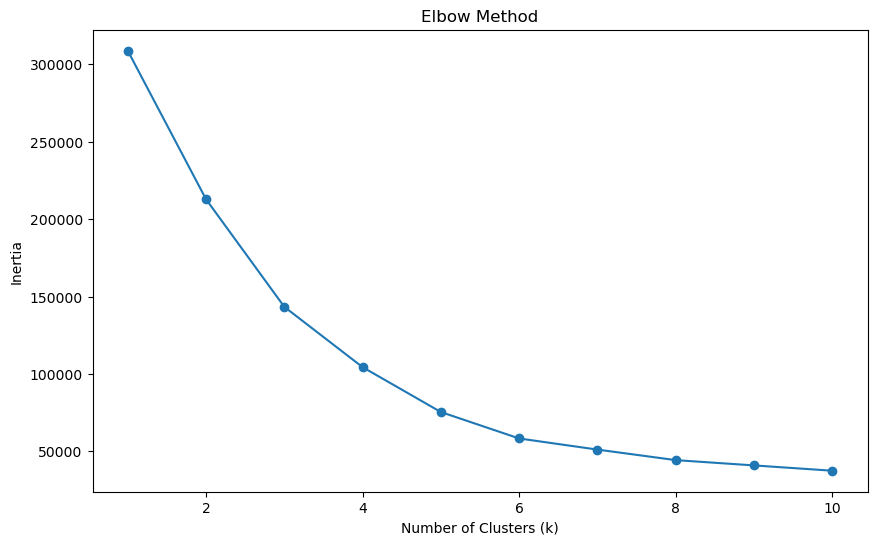

In [28]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [29]:
# Based on the elbow plot, optimal K value is 5
optimal_k = 5

# Performing K-means clustering with the optimal K=5 value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data)


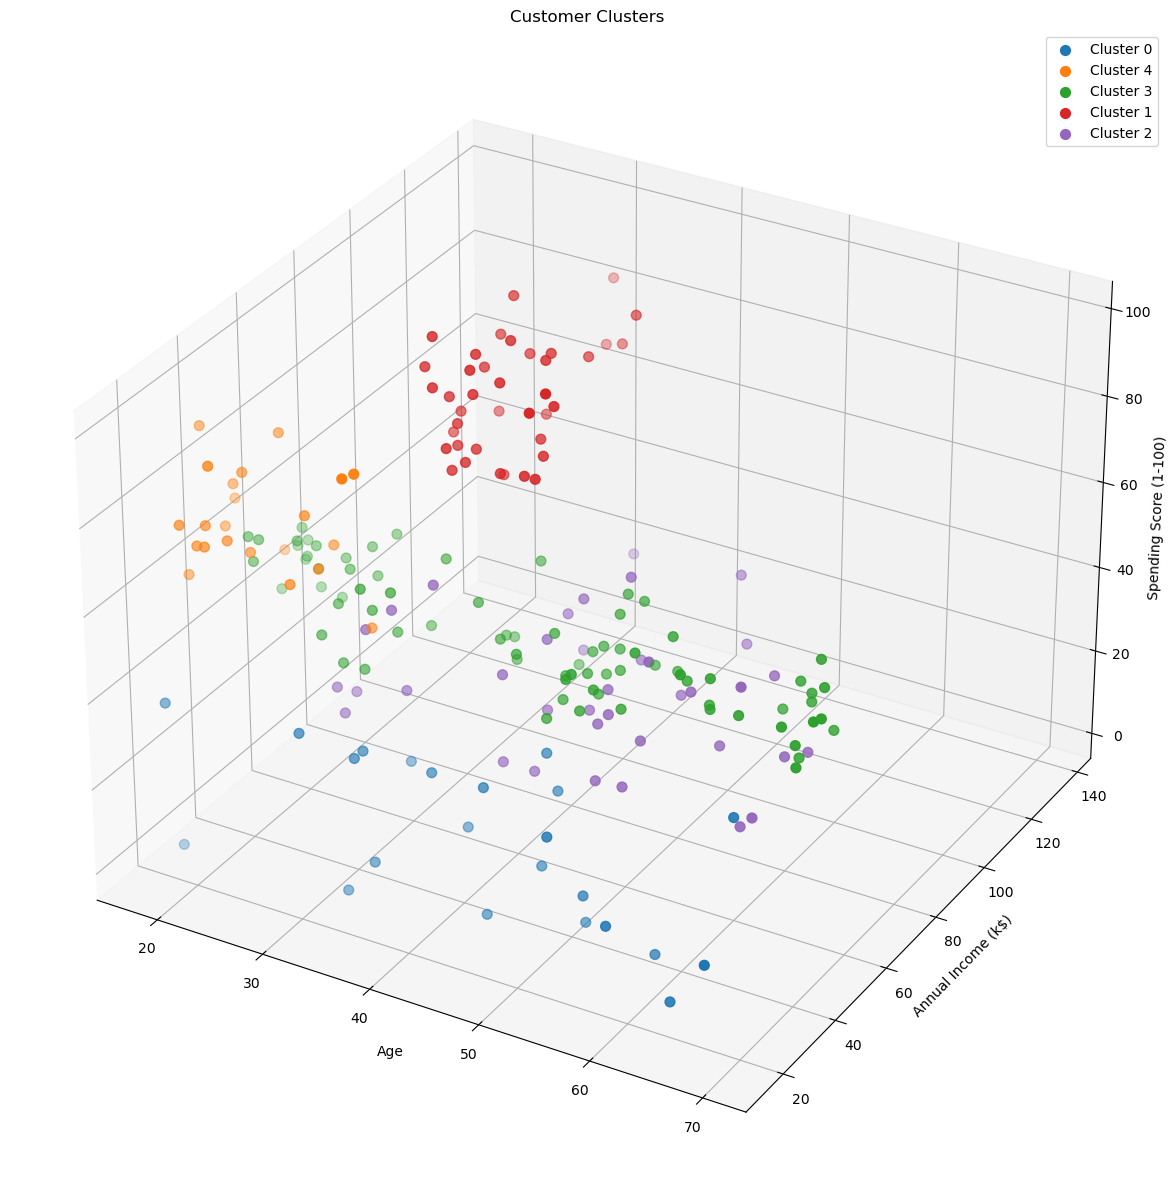

In [30]:
# Visualizing the clusters in a 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}', s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Clusters')
ax.legend()
plt.show()

# Part 4

Create a new set of toy datasets for regression problems. Come up with your own ideas on different datasets of varying difficulty, that would help you compare the pros & cons of different algorithms. Use these datasets to visualize LinearRegression, Support Vector Regression, Nearest Neighbor Regression, and Decision Trees

### 1. A dataset with a clear linear relationship between the independent and dependent variable.

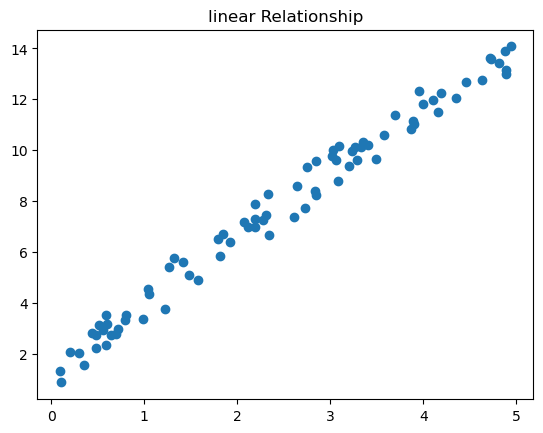

In [31]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Linear Dataset
x = np.sort(5 * np.random.rand(80, 1), axis=0)
y = 2.5 * x.ravel() + 1.5 + np.random.normal(0, 0.5, x.shape[0])

plt.scatter(x, y)
plt.title('linear Relationship')
plt.show()

### Visualization for different models on Linear Dataset:

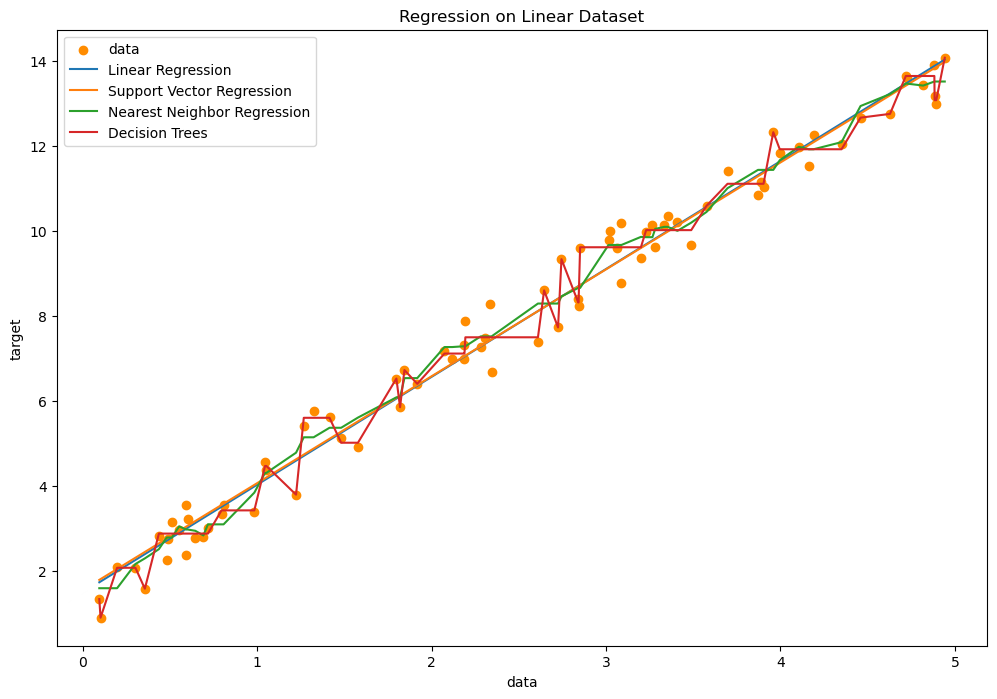

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

regressors = [
    ("Linear Regression", LinearRegression()),
    ("Support Vector Regression", SVR(kernel='linear')),
    ("Nearest Neighbor Regression", KNeighborsRegressor(n_neighbors=5)),
    ("Decision Trees", DecisionTreeRegressor(max_depth=5))
]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='darkorange', label='data')

for name, regressor in regressors:
    regressor.fit(x, y)
    y_pred = regressor.predict(x)
    
    # Plotting
    lw = 2
    plt.plot(x, y_pred, label=name)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Regression on Linear Dataset')
plt.legend()
plt.show()


### 2. A dataset where the relationship between the variables is clearly non-linear.

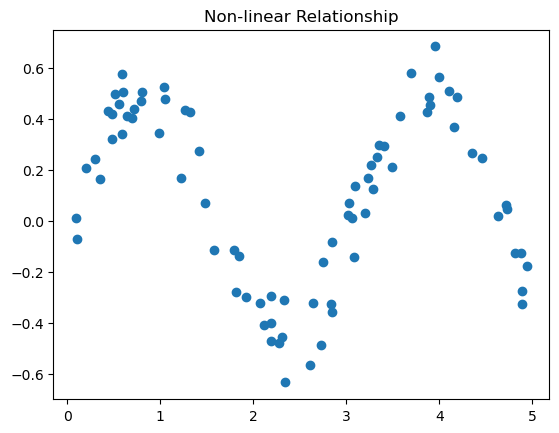

In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(x).ravel() * np.cos(x).ravel() + np.random.normal(0, 0.1, x.shape[0])

plt.scatter(x, y)
plt.title('Non-linear Relationship')
plt.show()


### Visualization for different models on Non-Linear Dataset:

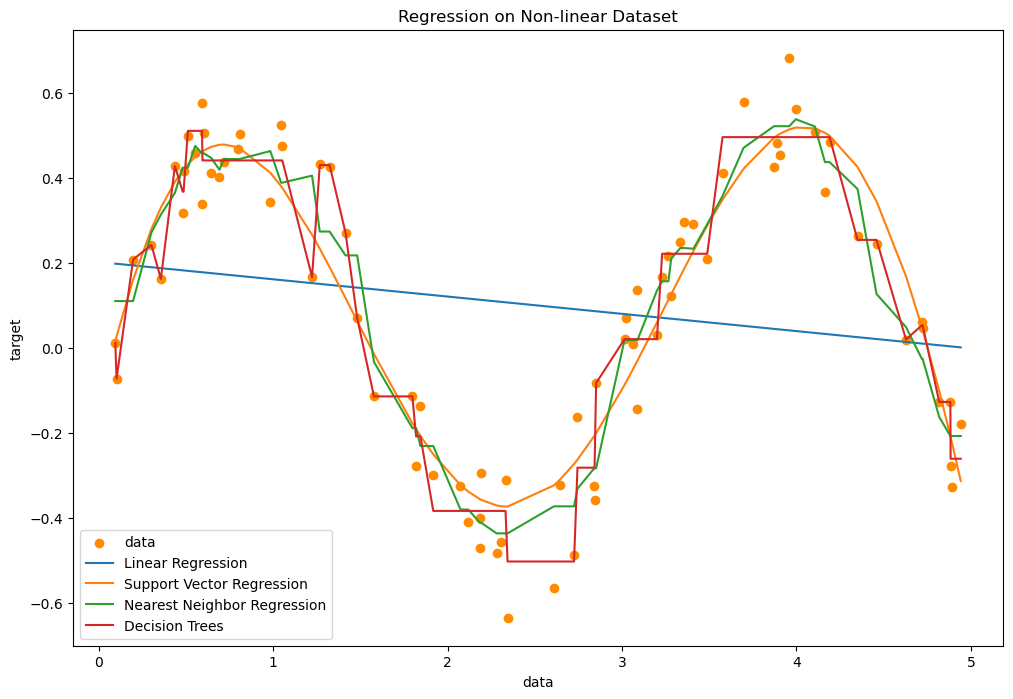

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

regressors = [
    ("Linear Regression", LinearRegression()),
    ("Support Vector Regression", SVR(kernel='rbf', C=100, gamma=0.1)),
    ("Nearest Neighbor Regression", KNeighborsRegressor(n_neighbors=5)),
    ("Decision Trees", DecisionTreeRegressor(max_depth=5))
]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='darkorange', label='data')

for name, regressor in regressors:
    regressor.fit(x, y)
    y_pred = regressor.predict(x)

    # Plotting
    plt.plot(x, y_pred, label=name)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Regression on Non-linear Dataset')
plt.legend()
plt.show()


### 3. A linear relationship with random noise and some clear outliers.

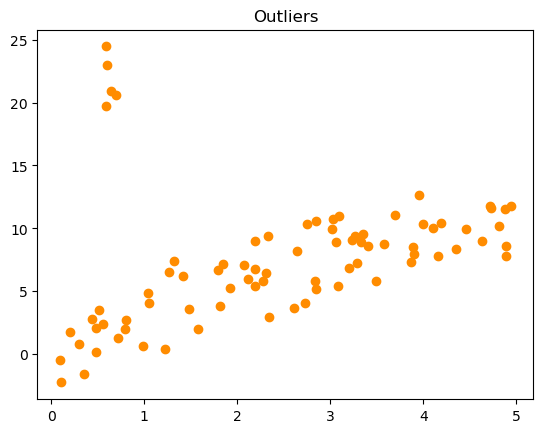

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.sort(5 * np.random.rand(80, 1), axis=0)
y = 2 * x.ravel() + 1 + np.random.normal(0, 2, x.shape[0])
y[10:15] += 20  # add outliers

plt.scatter(x, y, color='darkorange', label='Data')
plt.title('Outliers')
plt.show()

### Visualization for different models on Dataset which has outliers: 

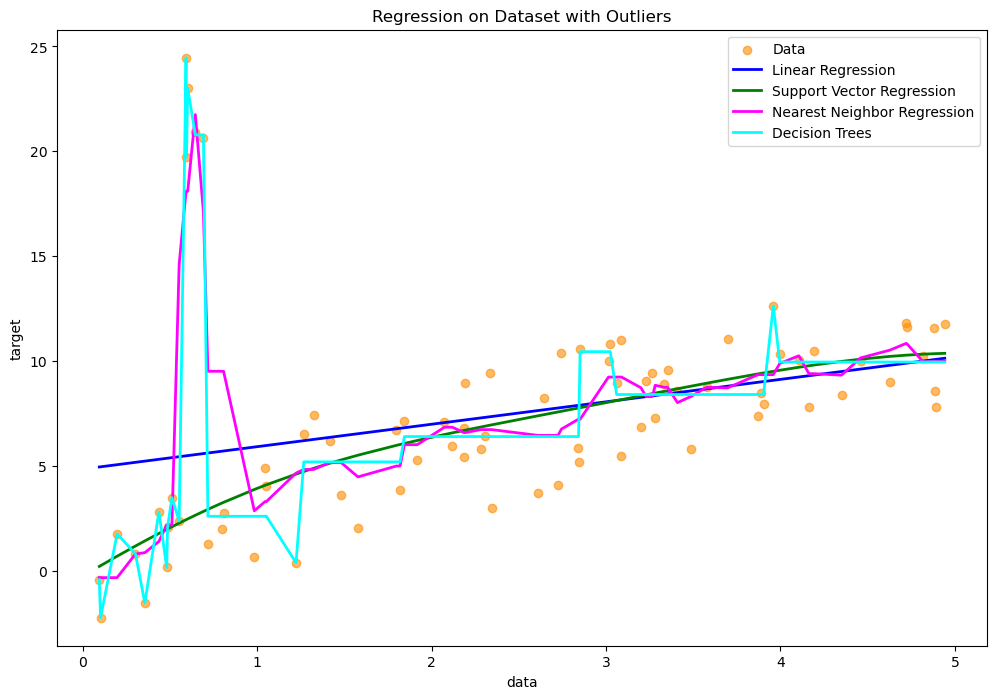

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Define regressors
regressors = [
    ("Linear Regression", LinearRegression(), 'blue'),
    ("Support Vector Regression", SVR(kernel='rbf', C=100, gamma=0.1), 'green'),
    ("Nearest Neighbor Regression", KNeighborsRegressor(n_neighbors=5), 'magenta'),
    ("Decision Trees", DecisionTreeRegressor(max_depth=5), 'cyan')
]

plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='darkorange', label='Data', alpha=0.6)

for name, regressor, color in regressors:
    regressor.fit(x, y)
    y_pred = regressor.predict(x)
    
    # Plotting
    plt.plot(x, y_pred, color=color, label=name, linewidth=2)

plt.xlabel('data')
plt.ylabel('target')
plt.title('Regression on Dataset with Outliers')
plt.legend()
plt.show()


* Linear Regression might perform well on linear data but may struggle with non-linear data and can be influenced by outliers.

* Support Vector Regression will likely adapt well to non-linear data, but its performance can vary with hyperparameters.

* Nearest Neighbor Regression can capture local patterns in the data, meaning it can handle non-linear data well, but might be noisy.

* Decision Trees are versatile and can capture both linear and non-linear relationships but can also overfit if there's noise or outliers.